# MSc Project: Analysing EEG data 

**Data source**: the dataset with EEG data for ADHD / control on children is available [here](https://ieee-dataport.org/open-access/eeg-data-adhd-control-children), and the relative article is [here](https://www.degruyter.com/document/doi/10.1515/bmt-2022-0100/html?casa_token=mQexJcMpDvcAAAAA:_AQbDgDT3K7E6kzWCpRq6_LthpnCaFRcI8VsNM5SfRbN0EaR-Aes1UGAE543D_aMvGK3p9bPkdGX).

**Methodology**: the main reference is the article "EEG conformer: Convolutional transformer for EEG decoding and visualization", available [here](https://ieeexplore.ieee.org/abstract/document/9991178). 


In [6]:
from pathlib import Path

from scipy.io import loadmat

import matplotlib.pyplot as plt

In [3]:
DATA_DIR = Path.home() / "MyData/EEG_ADHD"

In [4]:
raw_control = DATA_DIR / "Control_part1" / "v44p.mat"

data = loadmat(raw_control)  
eeg_data = data ['v44p']
n_channels = eeg_data.shape[0]
n_time_samples = eeg_data.shape[1]
n_trials = eeg_data[2]

In [5]:
print(f"channels: {n_channels}, time samples: {n_time_samples}, trials: {n_trials}")

channels: 11393, time samples: 19, trials: [226 191 200 156 126  89 200  52  16 -57 200 126 126 126 -57  52 261  50
 121]


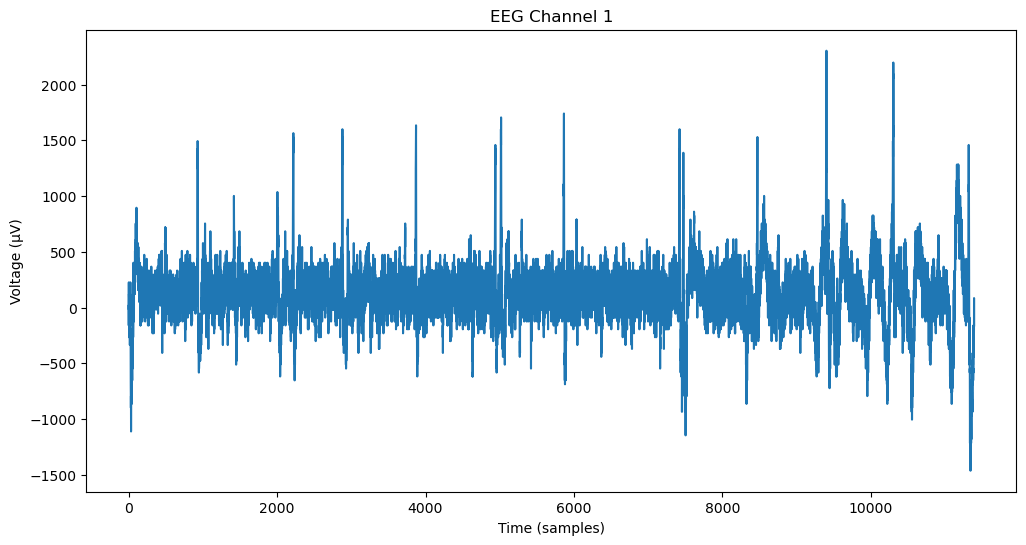

In [7]:
# Plotting the EEG data for a single channel
channel = 0  # Change this to the channel you want to plot
#time = range(eeg_data.shape[1])  # Assuming the second dimension is time
time = range(eeg_data.shape[0])  # Assuming the second dimension is time

plt.figure(figsize=(12, 6))
# plt.plot(time, eeg_data["channel", :])
plt.plot(time, eeg_data[:, channel])
plt.xlabel('Time (samples)')
plt.ylabel('Voltage (μV)')
plt.title(f'EEG Channel {channel + 1}')
plt.show()

In [6]:
#Process EEG data using MNE library
import mne

#MNE information object creation
sampling_rate = 256  # sampling rate of your data
info = mne.create_info(ch_names=[f"ch_{i + 1}" for i in range(n_channels)],
                       sfreq=sampling_rate,
                       ch_types='eeg')


In [7]:
#creating raw mne object
raw = mne.io.RawArray(eeg_data, info)

#Applying a bandpass filter as performed in the study from 1Hz to 48Hz
raw.filter(1, 48, method='iir')

#Plot
raw.plot(duration=60.0, scalings={'eeg': 20e-6}, n_channels=19)


Creating RawArray with float64 data, n_channels=11393, n_times=19
    Range : 0 ... 18 =      0.000 ...     0.070 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 48 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 48.00 Hz: -6.02, -6.02 dB

Using qt as 2D backend.
Using pyopengl with version 3.1.6


Channels marked as bad:
none
